# TP 2. Analyse du jeu de données Vowel via NB, LDA, QDA, k-NN

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import neighbors

# Dataset Vowel


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

Dans cette étude, on va s'intéresser au jeu de données "Vowel".
"Vowel" porte sur la reconnaissance des onzes "voyelles sonores" de l'anglais Britannique.
Ces sons sont les suivants : i, I, E, A, a:, Y, O, C:, U, u: et 3:

### Importation des données train et test

In [52]:
train=pd.read_csv('vowel.train.csv', sep=',', index_col=0)

array([[  2.   ,  -1.895,  -0.012,  -0.97 ,  -0.152,  -0.161,   1.509,
          0.487,   0.809,   0.044,  -0.264],
       [  3.   ,  -1.945,   0.352,  -1.053,  -0.228,  -0.12 ,   0.927,
          0.088,   0.509,  -0.279,  -0.246],
       [  4.   ,  -1.912,   1.554,  -1.455,  -0.017,  -0.118,   0.27 ,
         -0.037,   0.163,  -0.027,  -0.474],
       [  5.   ,  -2.724,   2.998,  -0.56 ,  -0.077,  -0.944,   0.548,
         -0.08 ,   0.4  ,   0.144,  -0.63 ],
       [  6.   ,  -2.385,   1.241,   0.272,  -0.04 ,  -0.692,   0.16 ,
         -0.061,  -0.189,   0.744,   0.088],
       [  7.   ,  -3.092,   3.014,  -0.307,  -0.016,  -0.956,   0.195,
         -0.227,   0.367,   0.958,  -0.092],
       [  8.   ,  -3.917,   3.496,   0.409,  -0.531,  -1.15 ,   0.017,
          0.605,   0.977,  -0.328,   0.447],
       [  9.   ,  -4.232,   3.035,   0.428,   0.497,  -1.374,   0.549,
          0.133,   0.232,   0.129,   0.487],
       [ 10.   ,  -4.759,   2.696,   0.104,   0.697,  -0.787,   1.114,
 

In [51]:
test=pd.read_csv('vowel.test.csv', sep=',', index_col=0)

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


In [49]:
np.unique(train['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

Comme expliqué plus haut, on s'intéresse à 11 voyelles. On doit donc traiter un problème de classification multi-classes à 11 classes.
Vérifions si le nombre d'observations par classes (class balancing) est bien équilibré.

#### Répartition des y

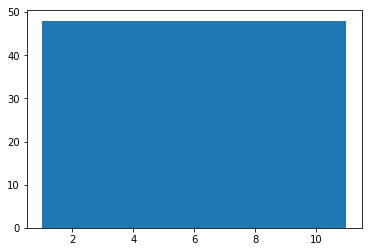

In [84]:
plt.hist(train['y'], bins = 11)
plt.show()

Toutes les classes sont équitablement représentées.

On défini les matrices X_train et X_test des features. Ainsi que Y_train et Y_test des labels.

In [101]:
Y_train = train.values[:,0]
X_train = train.values[:,1:]

Y_test = test.values[:,0]
X_test = test.values[:,1:]

(462, 10)


# Méthodes de prédiction

### Méthodes Naives Bayes, LDA et QDA

In [105]:
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [131]:
for name, clf in zip(names, classifiers):
    fit = clf.fit(X = X_train, y=Y_train)
    print("Sur le train, avec la méthode ", name," le score de précision est de :", ("%.3f" % accuracy_score(fit.predict(X_train),Y_train)))
    print("Sur le test, avec la méthode ", name," le score de précision est de :", ("%.3f" % accuracy_score(fit.predict(X_test),Y_test)))

Sur le train, avec la méthode  Naive Bayes  le score de précision est de : 0.720
Sur le test, avec la méthode  Naive Bayes  le score de précision est de : 0.461
Sur le train, avec la méthode  LDA  le score de précision est de : 0.684
Sur le test, avec la méthode  LDA  le score de précision est de : 0.444
Sur le train, avec la méthode  QDA  le score de précision est de : 0.989
Sur le test, avec la méthode  QDA  le score de précision est de : 0.472


Analysons ces différents résultats.

Pour la méthode Naive Bayes, les résultats ne semblent pas bons. Que ce soit sur les données d'apprentissage ou d'entraînement, le score de précision de la prédiction ne dépasse pas 72%.

Pour l'analyse discriminante linéaire (LDA), les valeurs obtenues sont encore moins bonnes. Mauvais apprentissage des données, avec un score de 68.4%, et donc mauvaise prédiction des labels sur le jeu d'entraînement.

Pour l'analyse discrimante quadratique (QDA), on ne semble pas obtenir de meilleurs résultats. Attention au sur-apprentissage des données avec 98.9% de score de précision sur le train, et une mauvaise prédiction sur le test avec 47,2% de précision.

### Méthode k-NN

In [153]:
acs_kNN_train = [] #ACcuracy Score _ k-Nearest-Neighbors _ train
acs_kNN_test = []
for i in range(1,50):
    kNN = neighbors.KNeighborsClassifier(n_neighbors=i)
    kNN_fit=kNN.fit(X_train, Y_train)
    acs_kNN_train.append( accuracy_score(kNN_fit.predict(X_train),Y_train))
    acs_kNN_test.append( accuracy_score(kNN_fit.predict(X_test),Y_test))
    
    #print("Pour k=",i,", le score sur le train est", ("%.3f" % accuracy_score(kNN_fit.predict(X_train),Y_train)))
    #print("Pour k=",i,", le score sur le test est", ("%.3f" % accuracy_score(kNN_fit.predict(X_test),Y_test)))

Dans cette partie de code, on va stocker les différentes valeurs de score de précision obtenues sur le train et sur le test avec la méthode des k plus proches voisins, pour k variant de 1 à 50.

#### Représentation graphique et interprétaiton

Text(0,0.5,'Accuracy score')

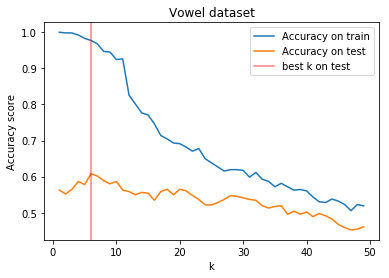

In [174]:
plt.plot(np.arange(1,50),acs_kNN_train,label="Accuracy on train")
plt.plot(np.arange(1,50),acs_kNN_test, label="Accuracy on test")
plt.axvline(np.arange(1,50)[np.argmax(acs_kNN_test)], label="best k on test", color="red", alpha=0.5)
plt.legend()
plt.title("Vowel dataset")
plt.xlabel("k")
plt.ylabel("Accuracy score")

On observe sur ces différentes courbes que le score de précision de prédiction à tendance a diminuer au fur et à mesure que notre k augmente.

La droite rouge nous indique que le k optimal pour faire la meilleure prédiction sur ce jeux de données avec la méthode k-NN est k=6 (voir courbe ci dessous pour plus de précision). Pour k=6, le score de précision est d'environ 65%.

5

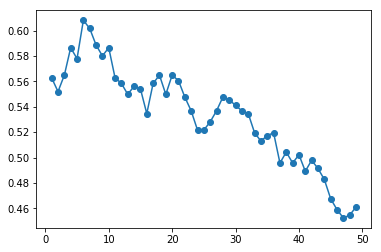

In [157]:
plt.plot(np.arange(1,50),acs_kNN_test, 'o-')